## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.5]
NUM_NEURONS = [[512, 256, 128], [512, 256, 128, 128]]

In [7]:
results = {}

for dropout in Dropout_EXP:
    for num_neurons in NUM_NEURONS:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with dropout = %.2f" % (dropout))
        
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neurons, drp_ratio=dropout)
        model.summary()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        exp_name_tag = "exp-{0}-{1}".format(dropout, len(num_neurons))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with dropout = 0.10
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.1581 - acc: 0.5850 - val_loss: 1.3389 - val_acc: 0.5243
Epoch 44/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.1580 - acc: 0.5845 - val_loss: 1.3336 - val_acc: 0.5301
Epoch 45/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.1448 - acc: 0.5868 - val_loss: 1.3290 - val_acc: 0.5326
Epoch 46/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.1466 - acc: 0.5861 - val_loss: 1.3472 - val_acc: 0.5257
Epoch 47/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.1424 - acc: 0.5888 - val_loss: 1.3318 - val_acc: 0.5310
Epoch 48/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.1377 - acc: 0.5895 - val_loss: 1.3563 - val_acc: 0.5261
Epoch 49/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.1276 - acc: 0.5920 - val_loss: 1.3714 - val_acc: 0.5237
Epoch 50/50
50000/50

50000/50000 [==============================] - 11s 226us/step - loss: 1.2403 - acc: 0.5507 - val_loss: 1.3734 - val_acc: 0.5160
Epoch 40/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.2349 - acc: 0.5534 - val_loss: 1.3585 - val_acc: 0.5212
Epoch 41/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.2298 - acc: 0.5564 - val_loss: 1.3534 - val_acc: 0.5224
Epoch 42/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.2195 - acc: 0.5616 - val_loss: 1.3731 - val_acc: 0.5143
Epoch 43/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.2197 - acc: 0.5617 - val_loss: 1.3633 - val_acc: 0.5174
Epoch 44/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.2121 - acc: 0.5630 - val_loss: 1.3681 - val_acc: 0.5166
Epoch 45/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.2082 - acc: 0.5639 - val_loss: 1.3444 - val_acc: 0.5227
Epoch 46/50
50000/50000 [=======

50000/50000 [==============================] - 11s 222us/step - loss: 2.0165 - acc: 0.2353 - val_loss: 2.0734 - val_acc: 0.2290
Epoch 38/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.0152 - acc: 0.2384 - val_loss: 2.0744 - val_acc: 0.2403
Epoch 39/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.0129 - acc: 0.2397 - val_loss: 2.0382 - val_acc: 0.2513
Epoch 40/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.0114 - acc: 0.2373 - val_loss: 2.0800 - val_acc: 0.2389
Epoch 41/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.0097 - acc: 0.2405 - val_loss: 2.0672 - val_acc: 0.2542
Epoch 42/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.0108 - acc: 0.2382 - val_loss: 2.0723 - val_acc: 0.2311
Epoch 43/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.0070 - acc: 0.2411 - val_loss: 2.0523 - val_acc: 0.2378
Epoch 44/50
50000/50000 [=======

50000/50000 [==============================] - 11s 227us/step - loss: 2.0073 - acc: 0.2284 - val_loss: 2.1324 - val_acc: 0.1960
Epoch 34/50
50000/50000 [==============================] - 12s 231us/step - loss: 2.0074 - acc: 0.2271 - val_loss: 2.0727 - val_acc: 0.2300
Epoch 35/50
50000/50000 [==============================] - 11s 226us/step - loss: 2.0124 - acc: 0.2258 - val_loss: 2.0635 - val_acc: 0.2328
Epoch 36/50
50000/50000 [==============================] - 11s 226us/step - loss: 2.0019 - acc: 0.2295 - val_loss: 2.0913 - val_acc: 0.2030
Epoch 37/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.0080 - acc: 0.2293 - val_loss: 2.0719 - val_acc: 0.1957
Epoch 38/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.0012 - acc: 0.2305 - val_loss: 2.1260 - val_acc: 0.1907
Epoch 39/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.9976 - acc: 0.2322 - val_loss: 2.1077 - val_acc: 0.2120
Epoch 40/50
50000/50000 [=======

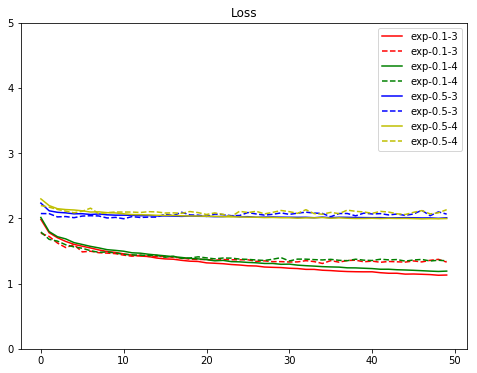

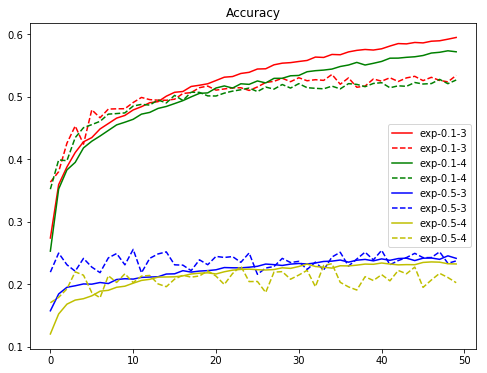

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()